# Bussiness Problem:-
## Twitter has become an important communication channel in times of emergency.The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).But, it’s not always clear whether a person’s words are actually announcing a disaster


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
train_data=pd.read_csv("D:\\TEJAS FORMAT\\EXCELR ASSIGMENTS\\EXCELR ASSIGMENTS\\NLP PROJECT\\TWITTER\\train.csv",na_values="-",encoding='latin1')

In [3]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
test_data=pd.read_csv("D:\\TEJAS FORMAT\\EXCELR ASSIGMENTS\\EXCELR ASSIGMENTS\\NLP PROJECT\\TWITTER\\test.csv",na_values="-",encoding='latin1')
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [5]:
import seaborn as sns

# Number of genuine reviews

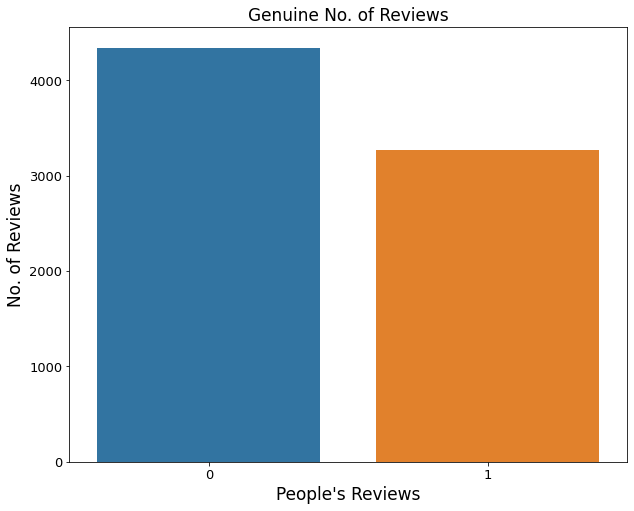

In [6]:
plt.figure(figsize=(10,8))
ax=sns.countplot(train_data['target'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)
ax.tick_params(labelsize=13)

In [7]:
import re
import string
import numpy as np

# Normalization 
## In Normalization , we need to remove the noise in the data. Noise that are present in the data like special characters, numbers, punctuation marks , cases, brackets etc.

In [8]:
#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = re.sub('\[.*?\]', '', text)#to remove the square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#to remove punctations
    text = re.sub('\w*\d\w*', '', text)#to remove digits
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n', '', text)
    tweet=re.sub('[^a-zA-z]'," ",text)
    return text
cleaned_data = lambda x: text_clean(x)

In [9]:
train_data["clean_data"]=pd.DataFrame(train_data.text.apply(cleaned_data))
train_data.head()

,id,keyword,location,text,target,clean_data
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


In [10]:
test_data["Clean_text"]=pd.DataFrame(test_data.text.apply(cleaned_data))
test_data.head()

,id,keyword,location,text,Clean_text
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills in China and Taiwan


In [11]:
train_data=train_data.drop(["id","keyword","location"],axis=1)
train_data

,text,target,clean_data
0,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary TheTawniest The out of control wild...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,S of Volcano Hawaii
7611,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...


## Wordcloud:- It is used to see what are most common words used. 

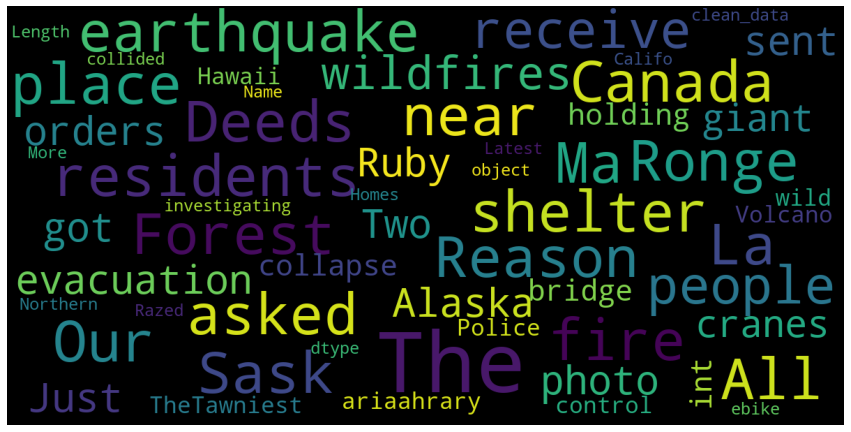

In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train_data['clean_data'])

# Stopwords:-
## Stopwords are repeated words which create noise.NLTK is inbuilt library of stopwords .

In [13]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
train_data['clean_data'] = train_data['clean_data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# VADER is an model which is applied on text data in the form of intensities to calculate sentiment scores . The sentiment scores of text can be obtained by summing the intensity of each word .

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [15]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [16]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [17]:
train_data['sentiment_score']=train_data['clean_data'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [18]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [19]:
train_data['review_category']=train_data['sentiment_score'].apply(lambda x:sentiment_category(x))

# Distribution of positve,neutral,negative reviews on basis of compound scores.

Text(0.5, 1.0, 'Distribution of Reviews Category')

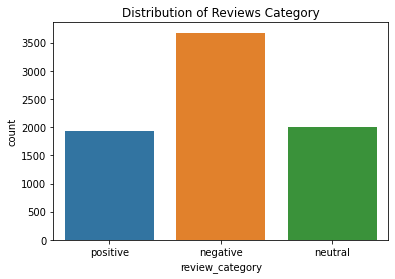

In [20]:
import seaborn as sns
sns.countplot(train_data['review_category']).set_title("Distribution of Reviews Category")

# CountVectorizer
## Countvectorizer converts all tokenize data into Machine readable format .Basically , it takes the words from data and first creates histogram of all words and then it converts to numbers which we can use to analyze it.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv=CountVectorizer()
x=cv.fit_transform(train_data["clean_data"]).toarray()

In [23]:
y=train_data["target"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Naive Bayes Model

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
print(classifier.score(x_train,y_train))

0.9210180623973727


In [28]:
y_pred=classifier.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test,y_pred)

array([[749, 137],
       [176, 461]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7944845699277742

# XG BOOST

In [33]:
from xgboost import XGBClassifier


In [34]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train,early_stopping_rounds=5, 
             eval_set=[(x_train,y_train)], 
             verbose=False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
print(xgb.score(x_train,y_train))
y_pred_xg=xgb.predict(x_test)

0.7412151067323481


In [37]:
confusion_matrix(y_test,y_pred_xg)

array([[837,  49],
       [357, 280]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred_xg)

0.7334208798424163

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
reg=LogisticRegression()
reg.fit(x_train,y_train)


C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
print(reg.score(x_train,y_train))
y_pred_lr=reg.predict(x_test)

0.9630541871921182


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [42]:
confusion_matrix(y_test,y_pred_lr)

array([[784, 102],
       [196, 441]], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred_lr)

0.804333552199606

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
rfc=RandomForestClassifier(random_state=4,n_estimators=500,warm_start=True,max_depth=6,min_samples_leaf=2,max_features='auto',min_samples_split=3)
rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=True)

In [52]:
print(rfc.score(x_train,y_train))
y_pred_rf=rfc.predict(x_test)

0.6026272577996716


In [53]:
confusion_matrix(y_test,y_pred_rf)

array([[886,   0],
       [589,  48]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_rf)

0.613263296126067

## From above models Logistic regression and naive bayes model is giving good accuracy & confusion matrix shows good results as compare to other models.

In [55]:
test_data['Clean_text'] = test_data['Clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_data.head()

,id,keyword,location,text,Clean_text
0,0,NaN,NaN,Just happened a terrible car crash,Just happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard earthquake different cities stay safe ev...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills China Taiwan


In [56]:
test_data

,id,keyword,location,text,Clean_text
0,0,NaN,NaN,Just happened a terrible car crash,Just happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard earthquake different cities stay safe ev...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills China Taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...,EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,Storm RI worse last hurricane My hardest hit M...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,Green Line derailment Chicago httptcoUtbXLcBIuY
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,MEG issues Hazardous Weather Outlook HWO


# CountVectorizer


In [58]:
X_test=cv.transform(test_data["Clean_text"]).toarray()

In [59]:
y_prediction=reg.predict(X_test)

In [60]:
y_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
test_data["output"]=y_prediction

In [62]:
test_data=test_data.drop(["keyword","location","text","Clean_text"],axis=1)

In [65]:
submission=pd.read_csv('D:/TEJAS FORMAT/EXCELR ASSIGMENTS/EXCELR ASSIGMENTS/NLP PROJECT/TWITTER/sample_submission.csv')


In [66]:
submission['target']=y_prediction


In [67]:
submission.to_csv('nlp_submission.csv',index=False)

## I am begineer in ML . Please let me know if any addition is req in above model & if my notebook is useful please upvote.